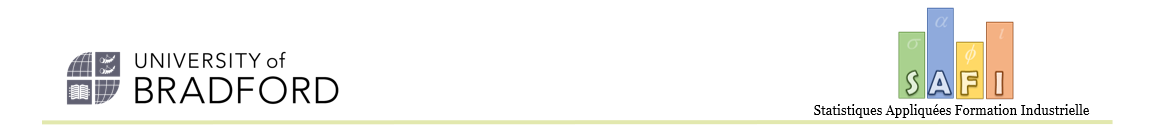

<font size=16>**Tutorial 6+7: Analysing a Two-Level Experiment**

# About this session

## Objectives

* Develop Python skills for analysing two-level full and fractional factorials.

## Engineering Scenario

We carry on at looking on a study of potential alternative materials for bumper bracket mouldings.

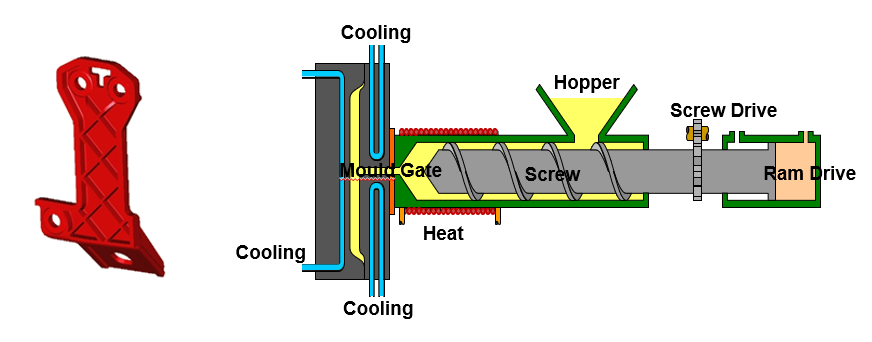

One of the functions of the part is to support the mass of the bumper below the grill opening, and the under tray mounted on the lower spoiler.

It also has to:
- resist aerodynamic loading on bumper and under tray surfaces
- give predictable strength during pedestrian impact
- prevent significant damage during 'snow bank' impact test

All these functions require the material to have predictable strength, the material under study was glass reinforced polypropylene.

One objective of the study was to assess whether the use of re-ground material would affect tensile strength (due to reduction in the length of the glass fibres and the molecular weight of the polymer) under a range of processing conditions.

In our example brackets are injection moulded (IM) and the factors are settings the IM machine. The factors which are considered for this study are as follow:

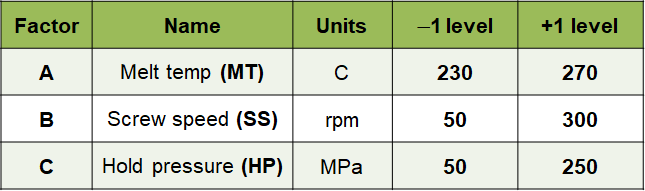

# Tutorial Tasks

## Task 1

Generate a $2^3$ design.

## Task 2

Export the design to include the response of the system and then import the edited file.

## Task 3

Produce coded units for the analysis.

## Task 4

Analyse the data using coded units.

## Task 5

Add diagnostic output.

---

## Task 6

Convert the coded design to uncoded units.

## Task 7

Analyse the main effect plots.

## Task 8

Analyse the interaction plots.

## Task 9

Analyse the plot of the response surface.

## Task 10

Analyse the half normal plot.

---

# Packages and special code

In this section we install any packages that are not standard Colab then we import the packages that we need need into the Python namespace.



## Uploading files to Colab

1. Click on the "Files" icon on the left hand side of the Colab window (it is a folder symbol). This will take you to the "Files" panel.
2. Drag and drop the files `M01BU.py` and `M05Data.xlsx` onto the Files panel.
3. Click on the "Contents" icon (to the left of the word "Files") to go to the Table of Contents panel.
4. Use the `ls` command to get a folder listing (useful for copying and pasting file names) by running the next cell.

In [ ]:
ls

## Import the courseware

Run the next cell to import the custom courseware. We have used the alias, `bu`, as shorthand for "Bradford Utilities"

In [ ]:
import M05BU as bu

## Package imports

Run the next cell to import the necessary packages into the Python namespace.

In [ ]:
import dexpy
import pandas as pd
import plotly.express as px
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import OLSInfluence

# **TS06**

# Task 1

## 1.1 Generate a two-level full factorial design

The next cell generates a $2^3$ factorial design in coded units, as we did in previous tutorials.

In [ ]:
df = bu.full_fact(3)

# Task 2

## 2.1 Export the file

The next cell saves the design matrix as a `.xlsx` file so that it can be downloaded and the experimental results can be added in a spreadsheet application.

In [ ]:
df.to_excel('TS06TwoLevelDoE.xlsx', index=False)

## 2.2 Edit and import the file

Download `TS06TwoLevelDoE.xlsx` file. Open it and add the response (strength) data column to this file. Strength data is stored in the file `M05Data.xlsx` at the sheet `Data for Tutorials 6,7`. Rename the columns `A`, `B` and ,C` to `MT`, `SS` and `HP` respectively.

Save the file with the same format (`.xlsx`), but a different name (for example, `DoE_Response.xlsx`) and upload the file back. Now it has both the design and response data.

The next cell import the design file with response variable data.

In [ ]:
df = pd.read_excel('DoE_Response.xlsx')
df.head()

## 2.3 Visualise your design

Create a 3D scatter plot for data visualisation. The figure uses the Plotly interactive library and can be zoomed and rotated with the mouse. For DoE design visualisation we only consider x-varaibles.

In [ ]:
fig = px.scatter_3d(
  df,
  x=df['A'],
  y=df['B'],
  z=df['C']
)

fig.update_layout(
  autosize=False,
  width=800,
  height=600
)

fig.show()

# Task 3

## 3.1 Generate the model matrix 

In [ ]:
# This cell appends the interaction terms to the design matrix above.
df['A*B'] = df['A'] * df['B']
df['A*C'] = df['A'] * df['C']
df['B*C'] = df['B'] * df['C']

## 3.2 Create a DataFrame containing the model matrix in coded units

In [ ]:
X_coded = pd.DataFrame(
    columns = (['intercept']
               + ['A', 'B', 'C']
               + ['A*B', 'A*C', 'B*C'])
)

In [ ]:
for col in X_coded.columns[1:]:
    X_coded[col] = df[col].copy(deep=True)
X_coded['intercept'] = 1.0

In [ ]:
X_coded

# Task 4

## 4.1 Analyse the data using coded units

We again use the the `OLS` (ordinary least squares) object that we imported from `statsmodels.api`.

In [ ]:
model = OLS(df['Strength'], X_coded).fit()

## 4.2 Use the courseware to format the results

The statsmodels summary method doesn't produce the output in the form that we need so we have provided some courseware that fromats the model output in a more friendly manner.

In [ ]:
Results = bu.RegResults(model)
bu.printMarkdown('## Coded Units')
bu.printMarkdown('### Regression Results')
Results

Changing the alpha parameter in the next cell will change the confidence limits that are displayed for the coefficients.

In [ ]:
Coefficients = bu.RegCoefficients(model, X_coded, alpha=0.2)
bu.printMarkdown('##Coded Units')
bu.printMarkdown('###Model Coefficients')
display(Coefficients)

### Interpretation of the results

Most of the statistical output looks like standard multiple regression output, but because this is a very small experiment the output must be interpreted with a lot of care, as suggested in the comments below.

From the statistical analysis above, "OLS Regression Results", it can be observed that we only have **one degree of freedom**, `Residual df` = 1, that is 8 runs minus 7 terms (including intercept).

As explained in the lecture session, the values of $R^2$ etc. in the `Model Summary` are effectively meaningless.

The linear effect of `C` (HP) is the only one with a small p-value (0.043), but the t-tests have very low power here, so we may well be **failing to detect some important effects**.

# Task 5

## 5.1 Add diagnostic output to the DataFrame

In the following cell we add residual diagnostic output to the regression data in the dataframe. We will use this dataframe to generate residual plots.

In [ ]:
df['fits'] = model.fittedvalues                                                                  # fitted values
res = OLSInfluence(model)                                                                        # residual summary data
raw_resid = pd.DataFrame(res.resid,columns=['raw_resid'])                                        # raw residuals
df_resid = pd.concat([df, raw_resid, res.summary_frame()['student_resid']], axis=1)              # creating dataframe
df_resid.head(10)

### Interpretation of the results

The table above tells us that all the residuals are same, standard _resid are ±1, so they are effectively meaningless. In any situation with ResDF = 1, the residuals will all have the same absolute value.

-----

# **TS07**

# Task 6

## 6.1 Convert coded design into engineering units

The next cells create a dataframe for plotting the main effect plots and interaction plots.

> For regression analysis it is better to use coded units but for plots and visualisations we generally prefer the actual values rather than coded units.

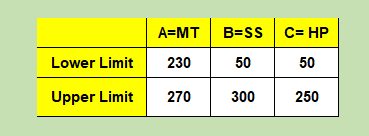


In [ ]:
actual_lows = {
    'A': 230,
    'B': 50,
    'C': 50,
}
actual_highs = {
    'A': 270,
    'B': 300,
    'C': 250,
}

In [ ]:
actual_design = dexpy.design.coded_to_actual(
    X_coded, actual_lows, actual_highs
)

actual_design = actual_design.drop(['A*B', 'A*C', 'B*C'], axis=1)
actual_design = pd.concat([actual_design, df_resid['fits']], axis=1, sort=False)
actual_design = actual_design.rename(columns={'fits': 'Strength'})

In [ ]:
display(actual_design)

# Task 7

## 7.1 Main Effect Plots

The next cell generates the main effects plot (see TS06 lecture notes) by using the function `bu.effect_plot()`.

In [ ]:
fig, axes = bu.effect_plot(
    x_vars=['A', 'B', 'C'],
    y_var=['Strength'],
    df=actual_design
)

## 7.2 Edit the Main Effect Plots and adjust the scale

By default `bu.effect_plot()` function plots shared y-axis (response) with same bounds for all three variables, but you can edit the range by using the function `ax.set_ylim()`:

In [ ]:
axes[0].set_ylabel('Mean of Strength')      # Edit to change y-axis label
axes[0].set_ylim(40, 43)                    # Edit to change the y-axis scale
fig.suptitle('Main Effect Plots For Fitted-Strength Means')
fig

You can also change the x-axis scale in the same way.

### Interpretation of the results

The plot above is using `Fitted Means` to create effects plot but this can also be done based on `Data Means`.

For completely orthogonal experiments the plots are identical, and in other cases we recommend that you use `Fitted Means` because the plots can then be related directly to the fitted response surface.

The plot above shows that:

- The hold pressure (HP) has a positive and most significant effect on the strength, i.e. by increasing the hold pressure tensile strength improves as well.
- The tensile strength is least affected by the changes in screw-speed (SS).
- The melt temperature (MT) has a negative effect on the strength, by increasing the temperature we notice a reduction in the strength of the material.

> One can also determine if the effect is positive or negative by observing the coefficients. If the coefficient is negative that would indicate a decreading trend and vice versa.

# Task 8

## 8.1 Interaction Plots

The next cell generates the visualisation of the two factor interactions (see TS07 Lecture slides) by calling `bu.interact_plot()` function.

Note: the code below considers $2fi's$ $ $ among the three variables but can be easily edited to include more than three.

In [ ]:
fig, axes = bu.interact_plot(
    [actual_design['A'], actual_design['B'], actual_design['C']],
    actual_design['Strength']
)

## 8.2 Edit the Interactions Plot

We can edit the interactions plots in the same way as main effect plot but in here we will need to define the axis locations. The numbers between the square brackets identify the row and column of the subplot. In the example below `[0, 1]` means the first row and the second column (remember that indexing in Python starts from 0!).

In [ ]:
fig.suptitle('Interaction Plot for Strength')
axes[0, 1].set_ylabel('Mean of Strength')           # y-axis label of the subplot in the 1st row 2nd column of the figure
axes[0, 1].set_title('SS*MT')

axes[1, 0].set_ylabel('Mean of Strength')           # y-axis label of the subplot in the 2nd row 1st column of the figure
fig

### Interpretation of the results

Evaluate the lines to understand how the interactions affect the relationship between the factors and the response.

- Parallel lines: no interaction occurs.
- Nonparallel lines: an interaction occurs. The more nonparallel the lines are, the greater the strength of the interaction.

Although you can use this plot to display the effects, be sure to evaluate the statistical significance (**p-value**) of the effects. If the interaction effects are significant, you cannot interpret the main effects without considering the interaction effects.

# Task 9

## 9.1 Surface Plots

The next cell generates response surface plots using `bu.surf_plot()` function.

In [ ]:
fig, axes = bu.surf_plot(
    [actual_design['A'], actual_design['B'], actual_design['C']],
    actual_design['Strength']
)

## 9.2 Edit the Surface Plot and adjust the scale

By default `bu.surf_plot()` function plots the z-scale (response) on the same scale for all three variables, but you can edit the range by using the function `ax.set_zlim()`:

In [ ]:
fig.set_size_inches(15, 8)                          # figure size
fig.suptitle('Surface Plot for Strength', y=0.75)   # title of the plot and its position
axes[0].set_ylabel('MT')                            # x-label for 1st plot from left
axes[0].set_xlabel('SS')                            # y-label for 1st plot from left
axes[0].set_zlabel('\nStrength')                    # z axis-label for 1st plot from left i.e. ax1
axes[0].view_init(15, 50)                           # the viewing angle
axes[0].set_zlim(40, 43)                            # the z-axis scale
fig

# Task 10

## 10.1 Half Normal Plot

The next cell generates a Half Normal plot using Lenth's method (see TS07 Lecture slides for details)

In [ ]:
model.params

In [ ]:
half_normal = bu.PSE(model, 0.15)

### Interpretation of the results

Lenth's method can be used to calibrate the plot when `ResDF` is zero, and in practice it is sensible to use it when `ResDF` is small (less than 5, say). As we have `Df Residuals = 1`, it would be sensible to use this approach.

In the plot above, the effects that are **significant are highlighted with a red circle**.

The test is not graphical – it is a "pseudo t test" with the ordinary standard error replaced by Lenth's PSE.